In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:

train =  pd.read_csv("train_final.csv")
test= pd.read_csv("test_final.csv")

print(train.columns)
print(test.columns)

Index(['TIPO_PROD_PROY', 'TIPO_ACT_OBRA_ACCINV', 'META', 'CANT_META_ANUAL',
       'CANT_META_SEM', 'AVAN_FISICO_ANUAL', 'AVAN_FISICO_SEM', 'SEC_FUNC',
       'CATEGORIA_GASTO', 'MTO_PIA'],
      dtype='object')
Index(['TIPO_PROD_PROY', 'TIPO_ACT_OBRA_ACCINV', 'META', 'CANT_META_ANUAL',
       'CANT_META_SEM', 'AVAN_FISICO_ANUAL', 'AVAN_FISICO_SEM', 'SEC_FUNC',
       'CATEGORIA_GASTO'],
      dtype='object')


In [38]:
tipos_unicos = train['TIPO_PROD_PROY'].unique()
mapeo = {tipo: indice + 1 for indice, tipo in enumerate(tipos_unicos)}
train['TIPO_PROD_PROY_NUM'] = train['TIPO_PROD_PROY'].map(mapeo)
train
print(train['TIPO_PROD_PROY_NUM'].unique())
print(tipos_unicos)

[1 2]
['3.PRODUCTO' '2.PROYECTO']


In [39]:
tipos_unicos = train['TIPO_ACT_OBRA_ACCINV'].unique()
mapeo = {tipo: indice + 1 for indice, tipo in enumerate(tipos_unicos)}
train['TIPO_ACT_OBRA_ACCINV_NUM'] = train['TIPO_ACT_OBRA_ACCINV'].map(mapeo)
train
print(train['TIPO_ACT_OBRA_ACCINV_NUM'].unique())
print(tipos_unicos)

[1 2]
['5.ACTIVIDAD' '6.ACCION DE INVERSION']


In [40]:
tipos_unicos = train['CATEGORIA_GASTO'].unique()
mapeo = {tipo: indice + 1 for indice, tipo in enumerate(tipos_unicos)}
train['CATEGORIA_GASTO_NUM'] = train['CATEGORIA_GASTO'].map(mapeo)
train
print(train['CATEGORIA_GASTO_NUM'].unique())
print(tipos_unicos)

[1 2]
['5.GASTOS CORRIENTES' '6.GASTOS DE CAPITAL']


In [37]:
train

,TIPO_PROD_PROY,TIPO_ACT_OBRA_ACCINV,META,CANT_META_ANUAL,CANT_META_SEM,AVAN_FISICO_ANUAL,AVAN_FISICO_SEM,SEC_FUNC,CATEGORIA_GASTO,MTO_PIA
0,3.PRODUCTO,5.ACTIVIDAD,6,0,6,0,6,9,5.GASTOS CORRIENTES,0
1,3.PRODUCTO,5.ACTIVIDAD,20,0,6,0,6,23,5.GASTOS CORRIENTES,805
2,3.PRODUCTO,5.ACTIVIDAD,4,0,16,0,16,41,5.GASTOS CORRIENTES,0
3,3.PRODUCTO,5.ACTIVIDAD,1,0,6,0,6,4,5.GASTOS CORRIENTES,0
4,3.PRODUCTO,5.ACTIVIDAD,7,0,6,0,6,10,5.GASTOS CORRIENTES,8816
...,...,...,...,...,...,...,...,...,...,...
1459,3.PRODUCTO,5.ACTIVIDAD,21,0,0,0,0,58,5.GASTOS CORRIENTES,12779
1460,3.PRODUCTO,5.ACTIVIDAD,17,0,0,0,0,54,5.GASTOS CORRIENTES,180
1461,3.PRODUCTO,5.ACTIVIDAD,3,0,0,0,0,40,5.GASTOS CORRIENTES,31447
1462,3.PRODUCTO,5.ACTIVIDAD,19,0,0,0,0,56,5.GASTOS CORRIENTES,2250


In [42]:
columnas_seleccionadas = ['TIPO_PROD_PROY_NUM', 'TIPO_ACT_OBRA_ACCINV_NUM', 'META','CANT_META_ANUAL','CANT_META_SEM','AVAN_FISICO_ANUAL',
                          'AVAN_FISICO_SEM','SEC_FUNC','CATEGORIA_GASTO_NUM','MTO_PIA']
                          

# Crear un nuevo DataFrame con las columnas seleccionadas
trainf = train[columnas_seleccionadas].copy()
trainf


,TIPO_PROD_PROY_NUM,TIPO_ACT_OBRA_ACCINV_NUM,META,CANT_META_ANUAL,CANT_META_SEM,AVAN_FISICO_ANUAL,AVAN_FISICO_SEM,SEC_FUNC,CATEGORIA_GASTO_NUM,MTO_PIA
0,1,1,6,0,6,0,6,9,1,0
1,1,1,20,0,6,0,6,23,1,805
2,1,1,4,0,16,0,16,41,1,0
3,1,1,1,0,6,0,6,4,1,0
4,1,1,7,0,6,0,6,10,1,8816
...,...,...,...,...,...,...,...,...,...,...
1459,1,1,21,0,0,0,0,58,1,12779
1460,1,1,17,0,0,0,0,54,1,180
1461,1,1,3,0,0,0,0,40,1,31447
1462,1,1,19,0,0,0,0,56,1,2250


In [48]:
trainf['META'].describe()

count    1464.000000
mean       12.462432
std         7.395105
min         1.000000
25%         6.000000
50%        12.000000
75%        18.000000
max        27.000000
Name: META, dtype: float64

<Axes: xlabel='MTO_PIA', ylabel='Density'>

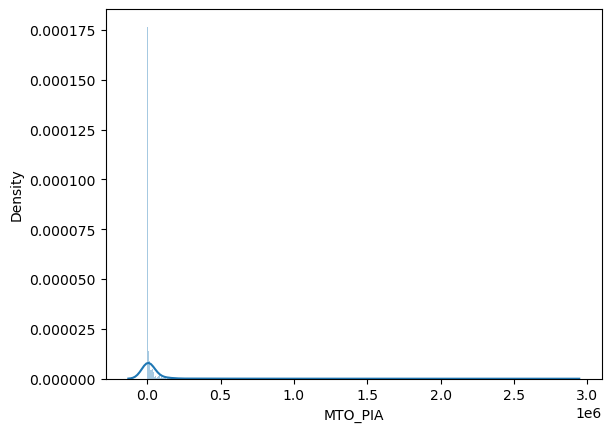

In [49]:
sns.histplot(
    trainf["MTO_PIA"], kde=True,
    stat="density", kde_kws=dict(cut=3),
    alpha=.4, edgecolor=(1, 1, 1, .4),
)

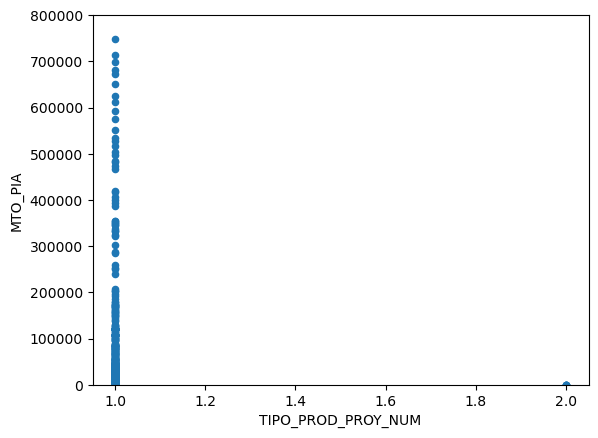

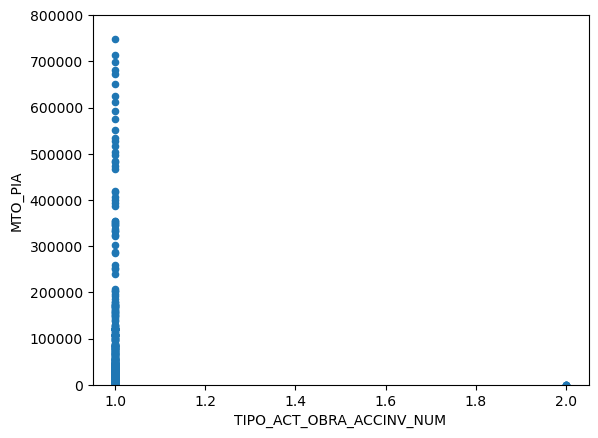

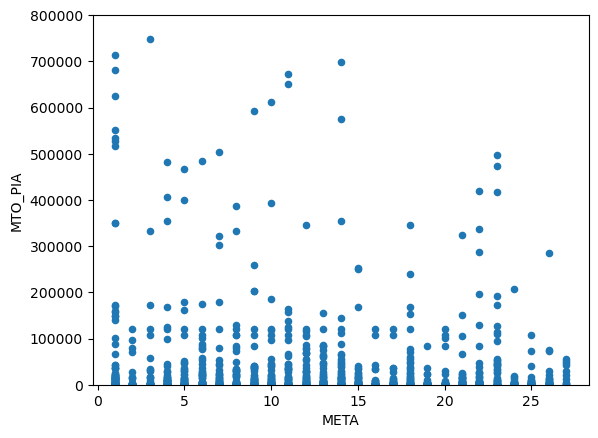

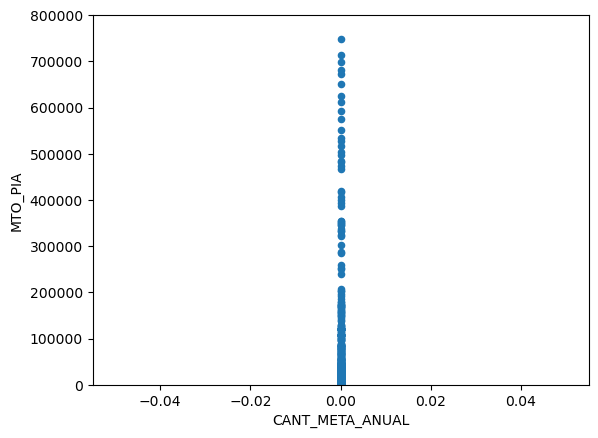

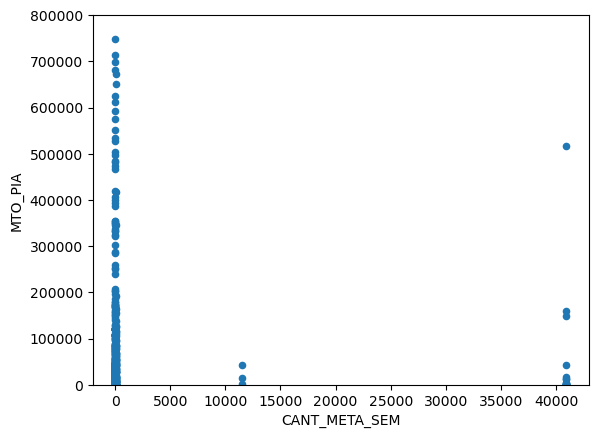

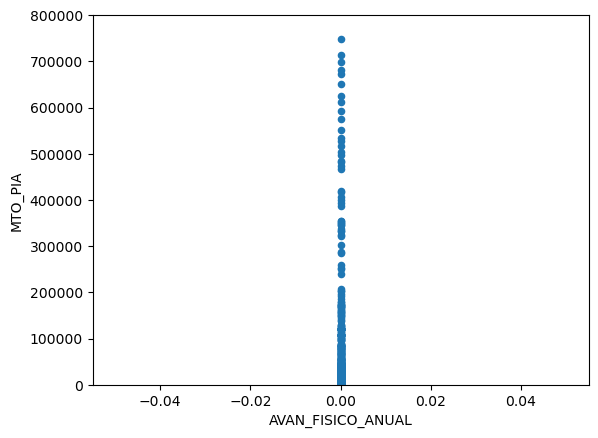

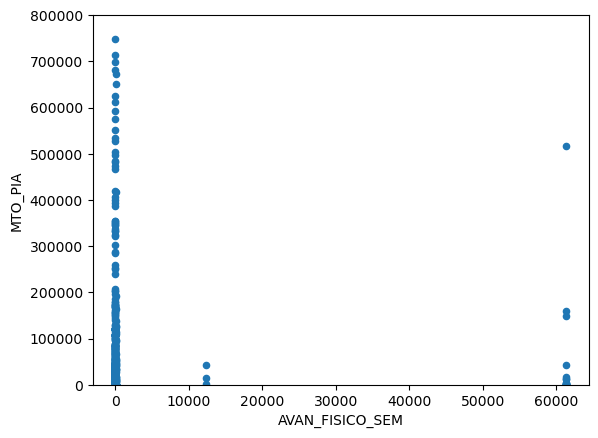

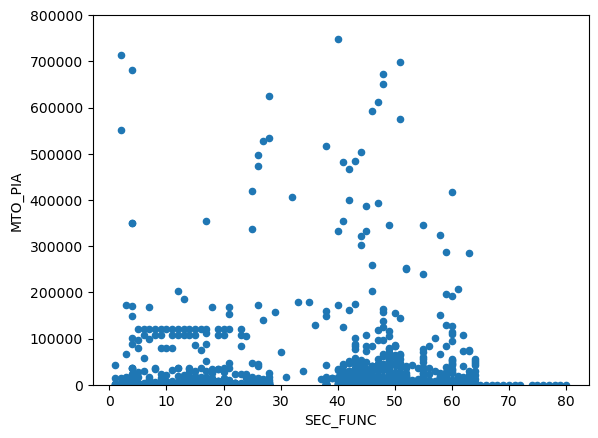

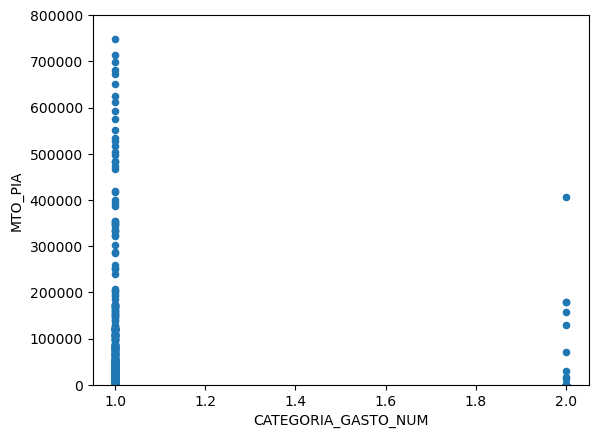

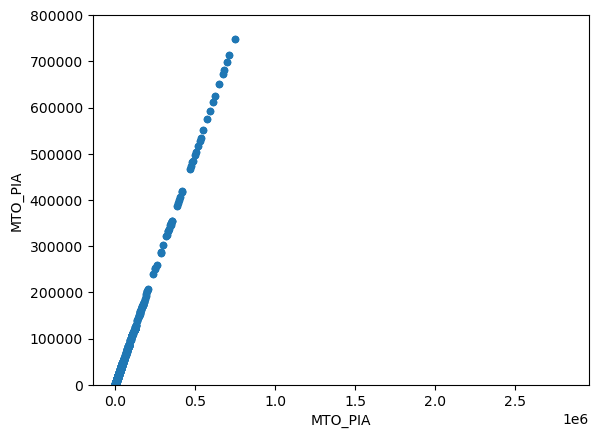

In [52]:


for columna in trainf.columns:
    
    data = pd.concat([trainf['MTO_PIA'], trainf[columna]], axis=1)
    data.plot.scatter(x=columna, y='MTO_PIA', ylim=(0,800000));

In [ ]:
k = 10 
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()